# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# EDA

In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


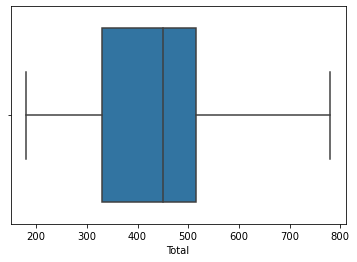

In [5]:
# Check for outliers
sns.boxplot(df['Total'])

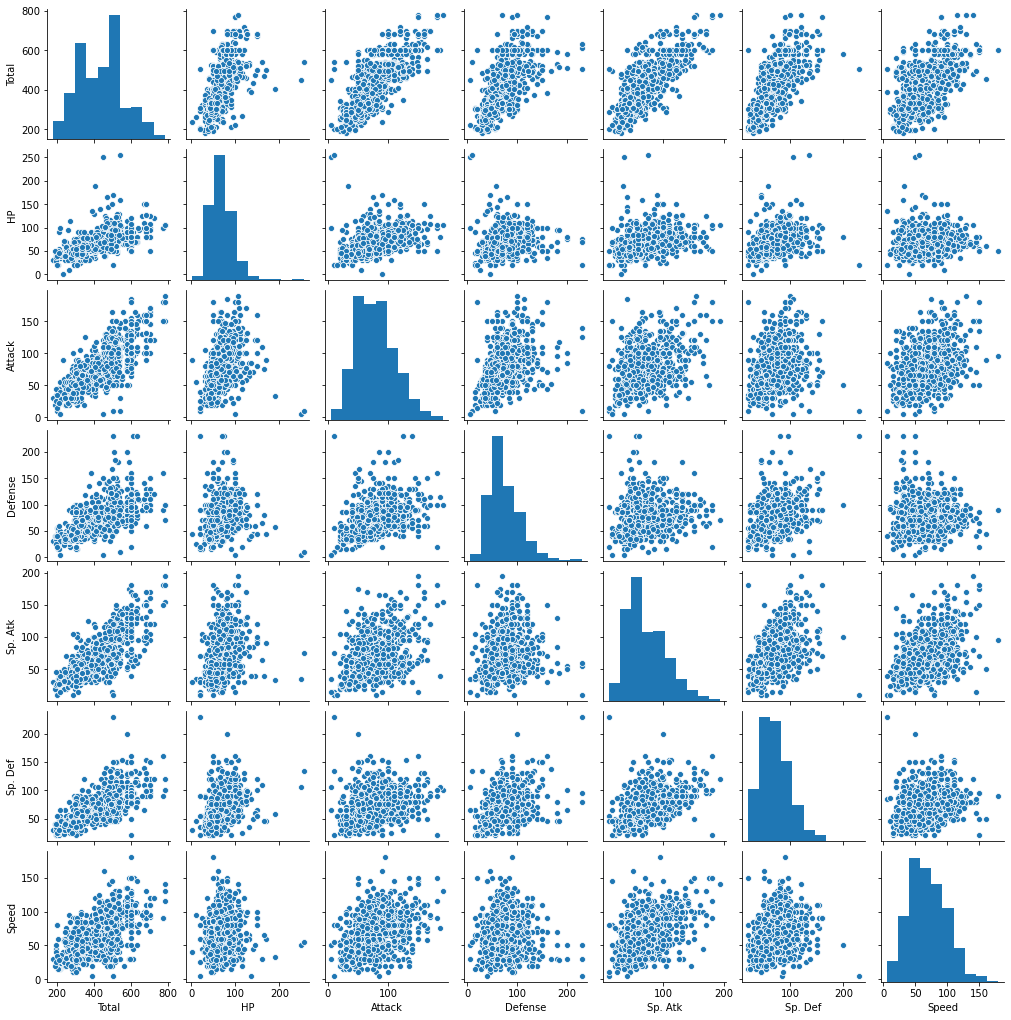

In [6]:
x = ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']

sns.pairplot(df[x] , height=2)

# Missing values

In [7]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
impute = SimpleImputer(strategy='most_frequent') # Replacing missing values with most frequently occuring value.

In [10]:
df_1 = impute.fit_transform(df)

In [11]:
final_df = pd.DataFrame(data=df_1,columns=df.columns)

In [12]:
final_df.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

# One - hot encoding

In [13]:
final_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False


In [14]:
final_df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [15]:
features = ['Type 1','Type 2','Generation','Legendary']

In [16]:
encoded_data = pd.get_dummies(final_df[features] , drop_first=True)

In [17]:
encoded_data.columns

Index(['Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy',
       'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost',
       'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal',
       'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel',
       'Type 1_Water', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric',
       'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying',
       'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice',
       'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock',
       'Type 2_Steel', 'Type 2_Water', 'Generation_2', 'Generation_3',
       'Generation_4', 'Generation_5', 'Generation_6', 'Legendary_True'],
      dtype='object')

In [18]:
encoded_df = pd.concat([final_df.drop(['#','Name','Type 1','Type 2','Generation','Legendary'] , axis=1) , encoded_data] , axis=1)

In [19]:
encoded_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,Legendary_True
0,318,45,49,49,65,65,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
encoded_df.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy',
       'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost',
       'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal',
       'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel',
       'Type 1_Water', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric',
       'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying',
       'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice',
       'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock',
       'Type 2_Steel', 'Type 2_Water', 'Generation_2', 'Generation_3',
       'Generation_4', 'Generation_5', 'Generation_6', 'Legendary_True'],
      dtype='object')

# Scaling

In [21]:
df_norm = (encoded_df-encoded_df.min())/(encoded_df.max()-encoded_df.min())

In [22]:
df_norm.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,Legendary_True
0,0.23,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.375,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.575,0.311024,0.416216,0.346667,0.48913,0.380952,0.428571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.47619,0.428571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.215,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# K-Means

# Finding optimal number of clusters

In [23]:
from sklearn.cluster import KMeans

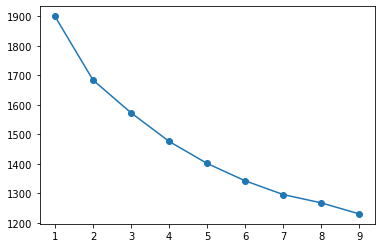

In [24]:
cluster_range = range(1,10)
errors = []

for i in cluster_range:
    clusters = KMeans(i)
    clusters = clusters.fit(df_norm)
    errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,errors,marker='o');    

In [25]:
clusters = KMeans(2)

In [26]:
clusters.fit(df_norm)

KMeans(n_clusters=2)

In [27]:
# MSE
clusters.inertia_

1684.1481121103736

In [28]:
df['K_Means_clusters'] = clusters.labels_

# H-Clustering

# --> Finding optimal number of clusters

Text(0, 0.5, 'Euclidean distances')

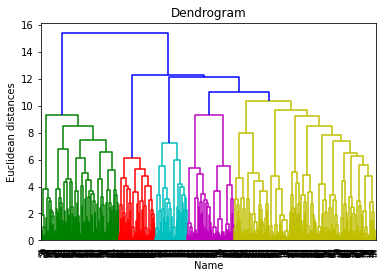

In [29]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Name')
plt.ylabel('Euclidean distances')

# --> Model

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='complete')  
cluster = cluster.fit_predict(df_norm)

In [31]:
cluster

array([ 4,  4,  4,  4,  5,  5,  5,  0,  5,  5,  5,  5,  5,  5,  5,  5,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  4,  4,  4,  4,  4,
        9,  9,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  9,
       10, 10, 10, 10,  5,  5,  5,  4,  4,  4,  4,  4, 11, 11, 11,  5,  5,
        3,  3,  3,  7,  7,  5,  5,  5,  5,  9,  4,  4,  5,  9,  4,  4,  4,
        4, 11, 10, 10,  5,  5,  5,  5,  3,  3,  5,  5,  5,  5,  5,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  3,  6,  5,  3,  5,  5,
        5,  5,  5,  5,  5,  9,  9,  5,  5,  5,  5,  5,  5,  2,  2,  2,  2,
        5,  5,  5,  5,  1,  1,  5,  5,  5,  1, 13,  1, 10,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  5,  9,  9,  5,
        5,  6,  5,  5, 10, 10,  5,  5,  5,  0,  5,  9,  9,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  9,  9, 10,  5,  5,  3,  5, 10, 10,  3,  5,  0,
        5,  5, 11, 11,  5

In [32]:
df['H_Clusters'] = pd.Series(cluster)

# Comparing clusters created by K-Means and H-Clustering

In [33]:
df[df['H_Clusters']==0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,K_Means_clusters,H_Clusters
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0,0
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False,0,0
220,205,Forretress,Bug,Steel,465,75,90,140,60,60,40,2,False,0,0
228,212,Scizor,Bug,Steel,500,70,130,100,55,80,65,2,False,0,0
229,212,ScizorMega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False,0,0
231,214,Heracross,Bug,Fighting,500,80,125,75,40,95,85,2,False,0,0
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,0,0
233,215,Sneasel,Dark,Ice,430,55,95,55,35,75,115,2,False,0,0
246,228,Houndour,Dark,Fire,330,45,60,30,80,50,65,2,False,0,0
247,229,Houndoom,Dark,Fire,500,75,90,50,110,80,95,2,False,0,0


In [34]:
df[df['H_Clusters']==1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,K_Means_clusters,H_Clusters
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,1,1
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,1,1
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,1,1
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,1,1
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True,1,1
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True,1,1
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,1,1
417,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True,0,1
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True,0,1
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True,0,1
